### Import and clean data

In [1]:
import csv #needed to import the CSV file
import math #needed for using the square root operation

#get the training data from CSV file, assumed to have a header, and include label column at the end, ex:
with open('1-kc_house_data.csv', newline='') as f:
    reader = csv.reader(f)
    dataset = list(reader)
    
#convert string values to integer
for row in range(len(dataset)):
    if (row==0):
        break
    for column in range(len(dataset[row])):
        if column==1:
            dataset[row][column] = string(dataset[row][column])
        else:
            dataset[row][column] = int(dataset[row][column])

### Identify the 1 feature to use in the classifier

In [2]:
#Select a few features of most interest
from pandas import DataFrame
df = DataFrame(dataset[1:],columns=dataset[0])  

df = df[['price', 'bedrooms', 'sqft_living', 'sqft_above', 'sqft_living15']]
df['price'] = df['price'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(int)
df['sqft_living'] = df['sqft_living'].astype(int)
df['sqft_above'] = df['sqft_above'].astype(int)
df['sqft_living15'] = df['sqft_living15'].astype(int)

# Draw correlation matrix
df.corr()

,price,bedrooms,sqft_living,sqft_above,sqft_living15
price,1.000000,0.308350,0.702035,0.605567,0.585379
bedrooms,0.308350,1.000000,0.576671,0.477600,0.391638
sqft_living,0.702035,0.576671,1.000000,0.876597,0.756420
sqft_above,0.605567,0.477600,0.876597,1.000000,0.731870
sqft_living15,0.585379,0.391638,0.756420,0.731870,1.000000


In [3]:
df = df[['price', 'sqft_living']]
dataset = df.values.tolist()

#convert data back to list
X = df['sqft_living'].values.tolist()
Y = df['price'].values.tolist()

df.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


### Plot feature and label

Text(0, 0.5, 'Nbre of Houses')

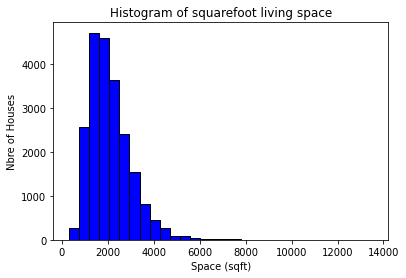

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib histogram
plt.hist(X, color = 'blue', edgecolor = 'black', bins = 30)

# Add labels
plt.title('Histogram of squarefoot living space')
plt.xlabel('Space (sqft)')
plt.ylabel('Nbre of Houses')

Text(0, 0.5, 'Nbre of Houses')

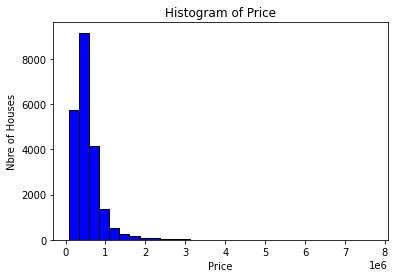

In [5]:
# matplotlib histogram
plt.hist(Y, color = 'blue', edgecolor = 'black', bins = 30)

# Add labels
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Nbre of Houses')

### Get Log values

In [6]:
logX = list()
logY = list()

for i in range(len(X)): logX.append(math.log(X[i], 10))
for i in range(len(Y)): logY.append(math.log(Y[i], 10))


Text(0, 0.5, 'Nbre of Houses')

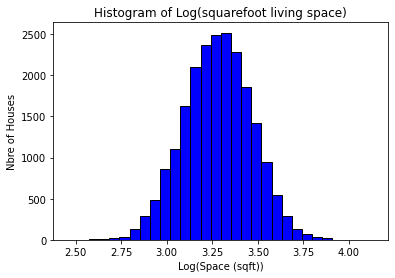

In [7]:
# matplotlib histogram
plt.hist(logX, color = 'blue', edgecolor = 'black', bins = 30)

# Add labels
plt.title('Histogram of Log(squarefoot living space)')
plt.xlabel('Log(Space (sqft))')
plt.ylabel('Nbre of Houses')

Text(0, 0.5, 'Nbre of Houses')

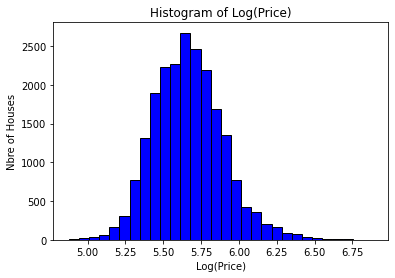

In [8]:
# matplotlib histogram
plt.hist(logY, color = 'blue', edgecolor = 'black', bins = 30)

# Add labels
plt.title('Histogram of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Nbre of Houses')

### Define the classifier

In [9]:
def linear_regression(X, Y, numberofiterations, learningrate):
    a = 0
    b = 0
    N = float(len(Y))
    for i in range(numberofiterations):
        total_a = 0
        total_b = 0
        for j in range(len(Y)):
            total_a = total_a + (X[j]*(Y[j] - (a*X[j] + b)))
            total_b = total_b + (Y[j] - (a*X[j] + b)) 
        derivative_on_a = (-2/N) * total_a
        derivative_on_b = (-2/N) * total_b
        a = a - (learningrate*derivative_on_a)
        b = b - (learningrate*derivative_on_b)
    return (a,b)


### Test and plot the classifier output for logX and logY

The fitted line is y = 1.5752x + 0.4944


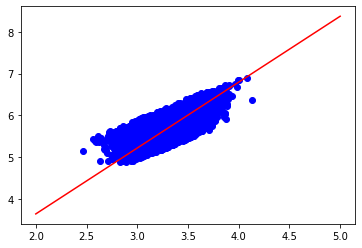

In [10]:
a,b = linear_regression(logX,logY, 1000, 0.001)
print(f"The fitted line is y = {round(a,4)}x + {round(b,4)}")

plt.plot(logX, logY, 'bo')

y = lambda x : a*x + b

def plot_line(y, logX):
    x_values = [i for i in range(math.floor(min(logX)), math.ceil(int(max(logX)))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

plot_line(y, logX)

### Test and plot the classifier output for X and Y

The fitted line is y = nanx + nan


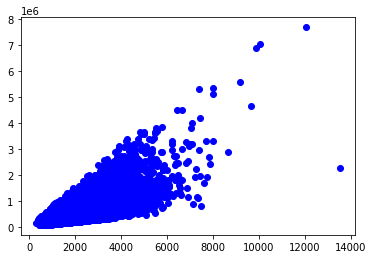

In [11]:
a,b = linear_regression(X,Y, 1000, 0.001)
print(f"The fitted line is y = {round(a,4)}x + {round(b,4)}")

plt.plot(X, Y, 'bo')

y = lambda x : a*x + b

def plot_line(y, X):
    x_values = [i for i in range(math.floor(min(X)), math.ceil(int(max(X)))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

plot_line(y, X)